<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [2]:
seeds = pd.read_csv("data/seeds.csv")

In [3]:
seeds.head()

area  perimeter  compactness  length  width  asymmetry_coeff  \
0  15.26      14.84       0.8710   5.763  3.312            2.221   
1  14.88      14.57       0.8811   5.554  3.333            1.018   
2  14.29      14.09       0.9050   5.291  3.337            2.699   
3  13.84      13.94       0.8955   5.324  3.379            2.259   
4  16.14      14.99       0.9034   5.658  3.562            1.355   

   groove_length  species  
0          5.220        1  
1          4.956        1  
2          4.825        1  
3          4.805        1  
4          5.175        1

### 2. Do some EDA of relationships between features.

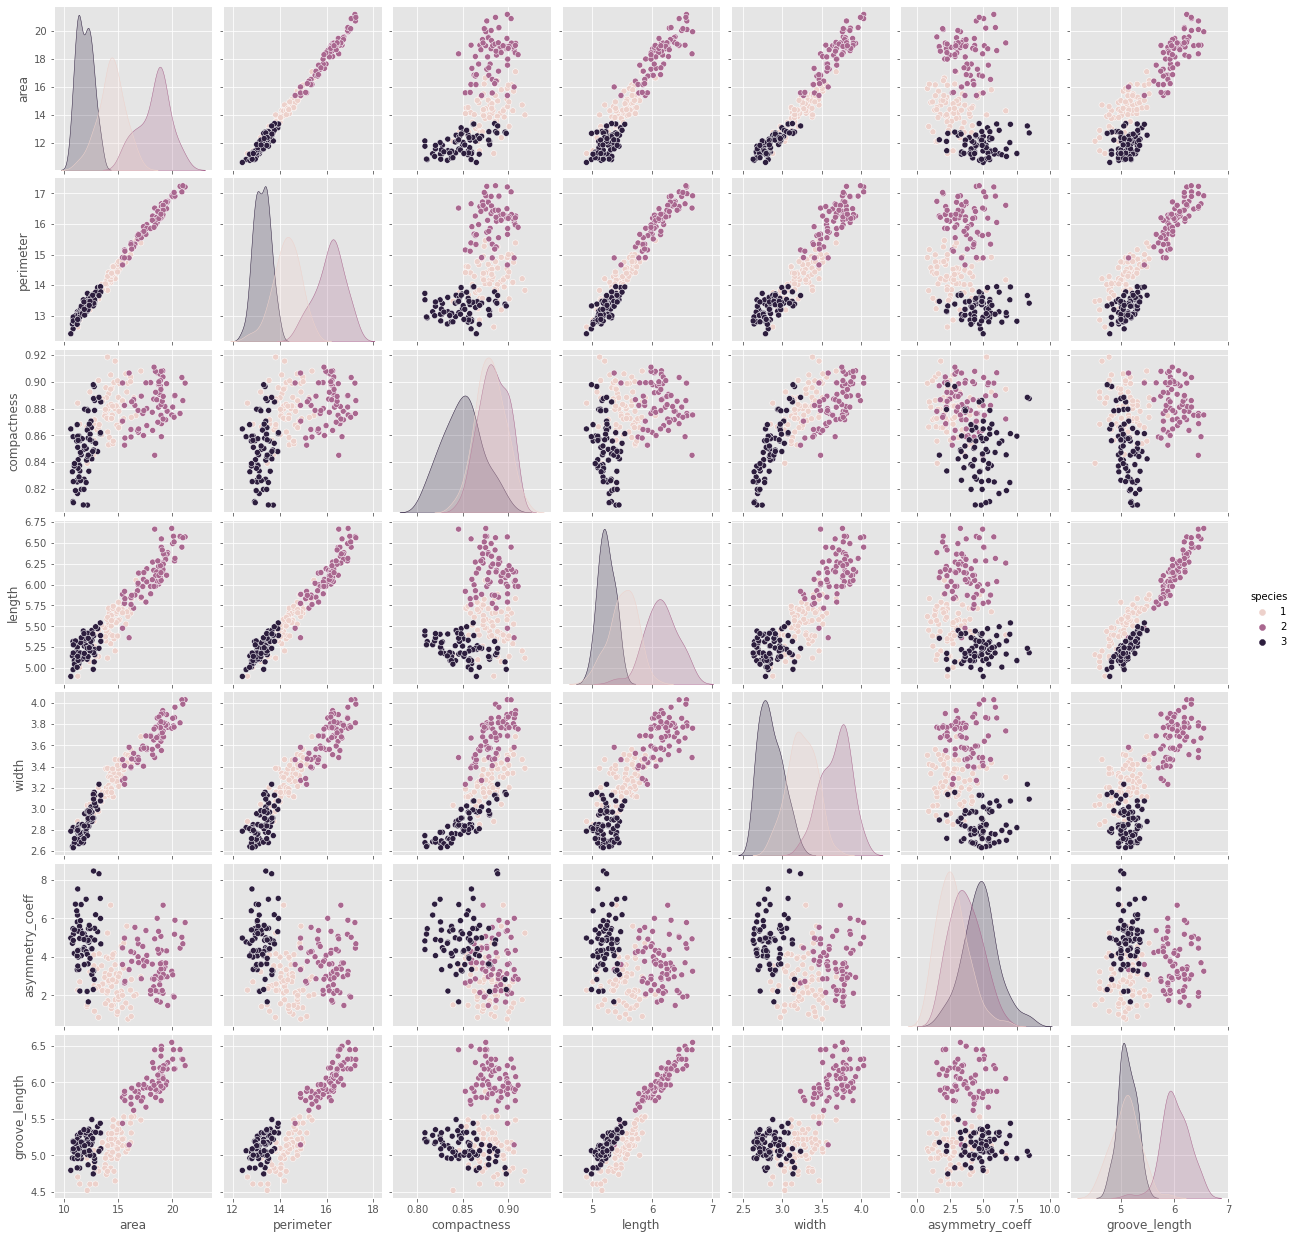

In [4]:
sns.pairplot(seeds, hue = 'species')

In [5]:
# Check for nulls
seeds.isnull().sum()

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

In [6]:
# Look at the real species labels.
seeds['species'].value_counts()

1    70
2    70
3    70
Name: species, dtype: int64

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [7]:
# A: 
df = seeds.drop(columns = ['species'])

In [8]:
X = df[['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry_coeff', 'groove_length']]

ss = StandardScaler()

Xs = ss.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [9]:
from sklearn.cluster import KMeans
km = KMeans(random_state = 42)

In [10]:
km.fit(Xs)

KMeans(random_state=42)

### 5. Get the labels and centroids for out first clustering model.

In [11]:
# A:
km.cluster_centers_

array([[ 1.26314609,  1.19475122,  1.04157553,  1.05908168,  1.3108507 ,
        -0.39929059,  1.12377631],
       [-0.9547672 , -0.97796255, -0.50243844, -0.9305756 , -0.93132964,
        -0.20353158, -0.81768841],
       [ 0.01844712,  0.02028527,  0.3620048 , -0.00597383,  0.09601806,
        -1.23217523, -0.43507557],
       [ 0.43262553,  0.51704589,  0.02233176,  0.53224988,  0.38275794,
         0.28462116,  0.55715604],
       [ 1.61942571,  1.67157001,  0.2266608 ,  1.79750045,  1.32995369,
         0.12559052,  1.75835455],
       [-1.17622733, -1.07265206, -1.77951102, -0.85211369, -1.41344188,
         0.85978629, -0.50004919],
       [-0.29130888, -0.39975894,  0.89775961, -0.64538323,  0.01921741,
        -0.40178224, -0.93589798],
       [-0.79895955, -0.83565556, -0.18070108, -0.83955374, -0.6665365 ,
         1.62911762, -0.59228938]])

In [12]:
km.labels_

array([2, 2, 6, 6, 2, 6, 6, 6, 3, 2, 3, 2, 6, 6, 6, 6, 6, 2, 6, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 6, 1, 2, 3, 3, 2, 2, 2, 3, 0, 2, 7, 6, 6, 6, 3,
       6, 2, 2, 2, 2, 2, 6, 3, 3, 6, 2, 2, 6, 2, 2, 1, 1, 1, 6, 1, 1, 6,
       2, 2, 2, 1, 4, 3, 3, 0, 3, 3, 3, 4, 4, 0, 3, 0, 4, 4, 4, 0, 0, 4,
       4, 4, 4, 0, 0, 0, 4, 3, 4, 4, 4, 0, 3, 0, 0, 4, 4, 0, 0, 0, 4, 0,
       0, 4, 0, 4, 4, 0, 0, 0, 0, 4, 4, 0, 3, 0, 6, 0, 4, 0, 4, 3, 0, 0,
       3, 3, 3, 6, 0, 3, 3, 3, 7, 7, 7, 7, 5, 5, 1, 1, 1, 5, 5, 5, 5, 5,
       5, 5, 1, 5, 5, 5, 1, 1, 5, 1, 7, 1, 5, 1, 5, 5, 5, 7, 5, 5, 5, 1,
       5, 5, 5, 1, 1, 7, 7, 7, 7, 5, 5, 5, 7, 1, 5, 1, 1, 5, 1, 7, 7, 6,
       1, 6, 7, 6, 1, 7, 1, 1, 1, 7, 1, 7])

### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [13]:
from sklearn.metrics import silhouette_score

# A:
silhouette_score(Xs, km.labels_)

0.251137716662038

In [14]:
df['cluster'] = km.labels_

<Figure size 504x504 with 0 Axes>

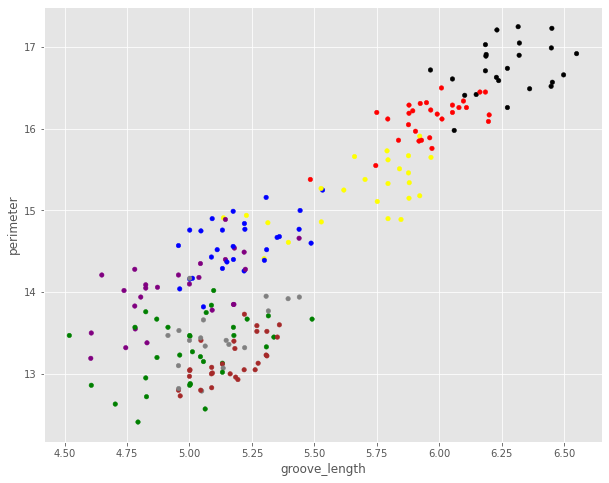

In [15]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue", "yellow", "black", "brown", "purple", "gray"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="groove_length", y="perimeter",
    figsize=(10,8),
    c = df['color']
)


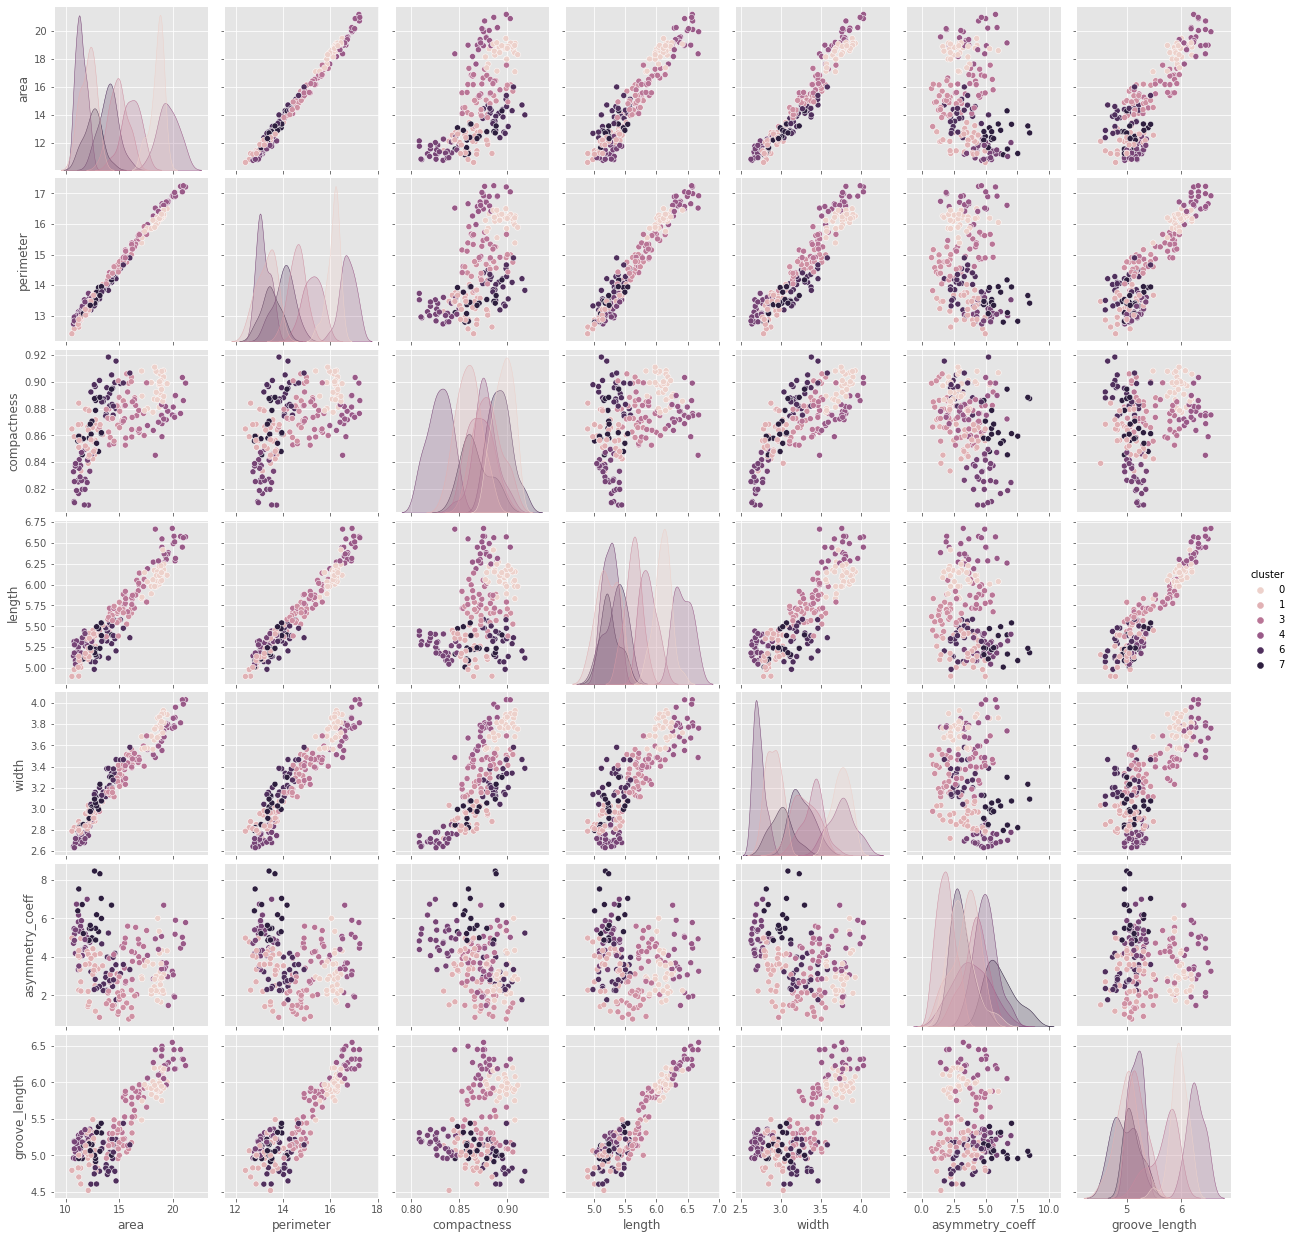

In [16]:
sns.pairplot(df, hue='cluster')

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [17]:
import random

random.randint(1,25), random.randint(1,25)

(9, 17)

In [18]:
# A:
km2 = KMeans(n_clusters = 10, random_state = 42)

In [19]:
km2.fit(Xs)

KMeans(n_clusters=10, random_state=42)

In [20]:
km2.cluster_centers_

array([[-1.02790806, -1.02053399, -0.84147103, -0.93303511, -1.08005463,
         0.21434906, -0.63858248],
       [ 1.53768267,  1.61240465,  0.12754763,  1.7872849 ,  1.21789926,
        -0.41498355,  1.76673183],
       [ 0.07100564, -0.03329376,  1.11323288, -0.32390799,  0.41396054,
        -0.70593154, -0.72501338],
       [ 0.61323505,  0.68796663,  0.1371661 ,  0.68801276,  0.55187761,
         0.12685499,  0.81786923],
       [-1.19025337, -1.06481207, -1.95937713, -0.79497178, -1.46346655,
         1.04055146, -0.46209935],
       [-0.16950743, -0.13662048,  0.04946084, -0.0900243 , -0.15800962,
        -0.75504865, -0.48680399],
       [-0.75724812, -0.79860744, -0.09027172, -0.80901866, -0.60777066,
         1.65844495, -0.60240705],
       [ 1.71714868,  1.65461993,  0.87818057,  1.52953731,  1.66685726,
         1.12828637,  1.4974816 ],
       [ 1.28474764,  1.19025178,  1.20326134,  1.04045276,  1.36986588,
        -0.60596945,  1.09411613],
       [-0.85763927, -0.9665

In [21]:
km2.labels_

array([5, 5, 2, 2, 2, 2, 5, 2, 3, 3, 5, 5, 2, 5, 5, 2, 2, 2, 2, 0, 5, 5,
       2, 9, 5, 2, 9, 9, 5, 5, 5, 5, 5, 5, 5, 2, 3, 8, 5, 6, 5, 5, 9, 3,
       2, 5, 2, 2, 5, 5, 5, 2, 5, 5, 5, 5, 2, 2, 2, 9, 9, 9, 9, 0, 9, 9,
       5, 5, 5, 0, 3, 3, 3, 8, 3, 3, 3, 1, 7, 3, 3, 7, 7, 1, 1, 8, 8, 1,
       7, 7, 1, 8, 8, 7, 1, 3, 1, 1, 1, 1, 3, 8, 7, 1, 1, 8, 8, 3, 1, 8,
       8, 1, 8, 7, 7, 1, 8, 1, 8, 1, 7, 3, 3, 8, 2, 8, 1, 8, 1, 3, 8, 8,
       3, 3, 3, 2, 3, 3, 3, 3, 6, 6, 6, 6, 4, 4, 0, 0, 0, 4, 0, 4, 4, 0,
       0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 6, 9, 0, 0, 4, 0, 4, 6, 0, 4, 4, 0,
       4, 4, 4, 0, 0, 6, 0, 0, 6, 4, 4, 0, 6, 0, 4, 0, 9, 4, 0, 6, 6, 6,
       0, 9, 6, 9, 0, 6, 0, 9, 0, 6, 0, 6])

In [22]:
silhouette_score(Xs, km2.labels_)

0.2550040271086972

In [23]:
df['cluster'] = km2.labels_

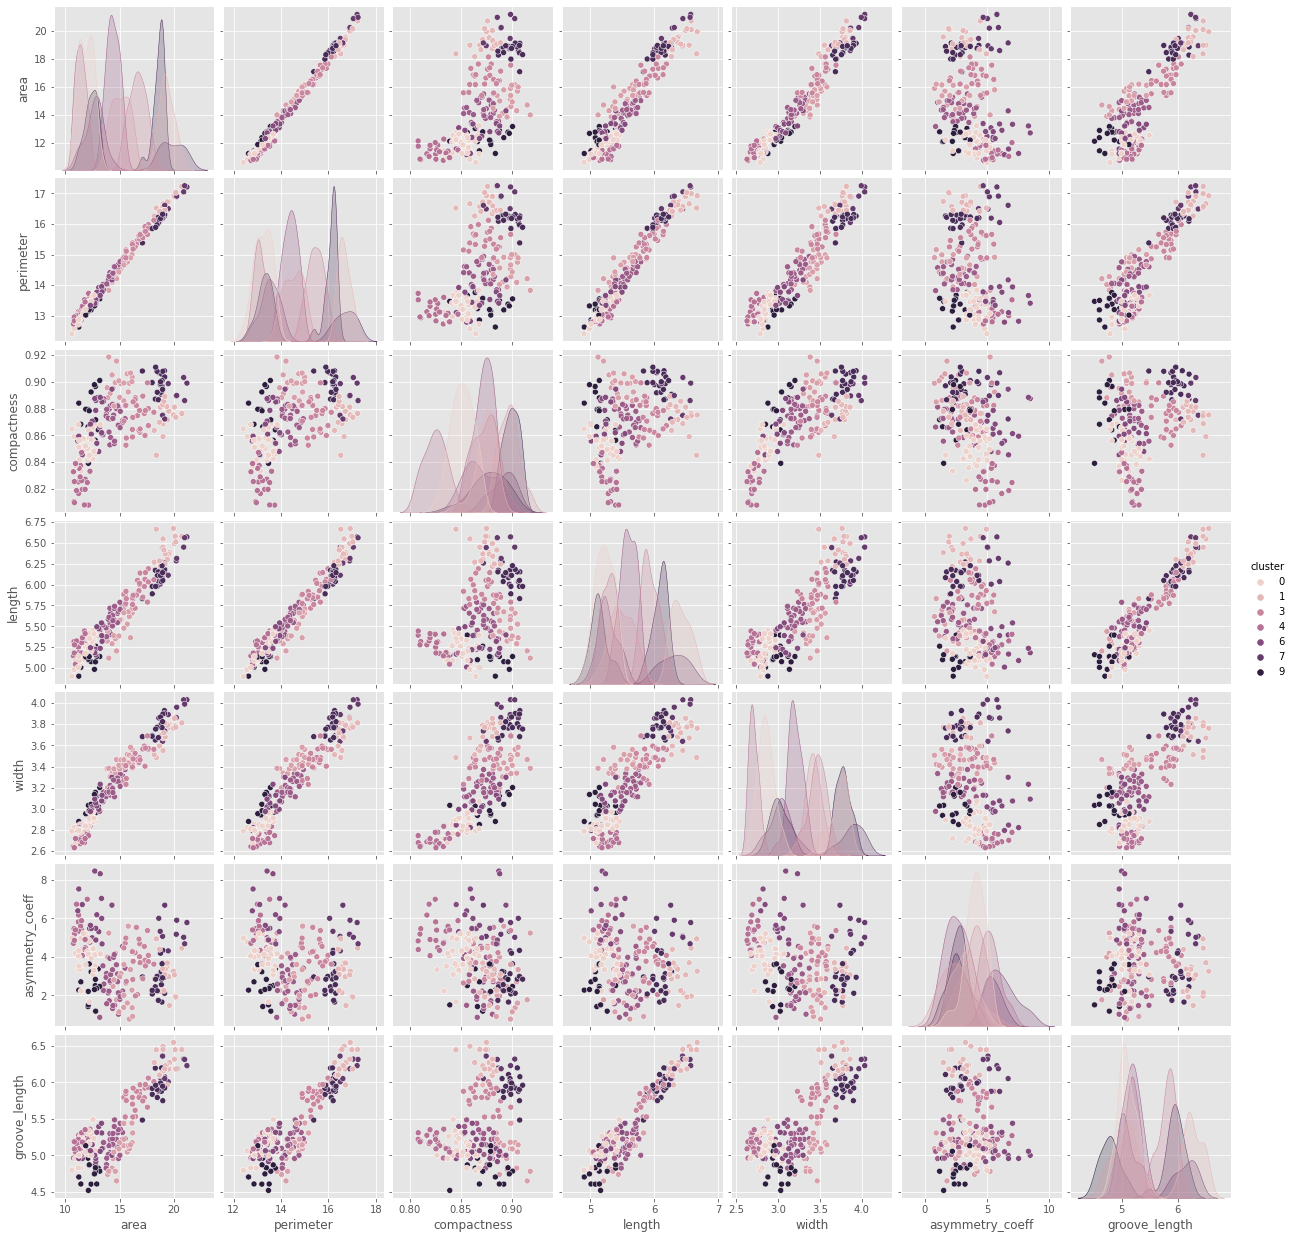

In [24]:
sns.pairplot(df, hue='cluster')

In [25]:
km3 = KMeans(n_clusters = 23, random_state = 42)

In [26]:
km3.fit(Xs)

KMeans(n_clusters=23, random_state=42)

In [27]:
km3.cluster_centers_

array([[-1.15178428e+00, -9.78078848e-01, -2.22740876e+00,
        -6.33926173e-01, -1.46519154e+00,  1.12544187e+00,
        -3.15593072e-01],
       [-2.59674569e-01, -3.01674824e-01,  4.82337237e-01,
        -3.79594027e-01, -9.97966019e-02, -6.88188040e-01,
        -7.64714693e-01],
       [ 1.57203497e+00,  1.63306947e+00,  2.04987892e-01,
         1.78174338e+00,  1.26753768e+00, -6.34042833e-01,
         1.74553558e+00],
       [-1.05941745e-01, -3.35651124e-02, -1.61140165e-01,
         5.63590483e-02, -1.18668274e-01, -2.57845918e-03,
        -3.37801293e-01],
       [-8.75208737e-01, -7.97704442e-01, -1.07616662e+00,
        -6.66806475e-01, -9.89890797e-01, -5.79811087e-01,
        -5.90589773e-01],
       [ 4.06979472e-01,  4.64489986e-01,  2.07924748e-01,
         4.22617449e-01,  4.10033407e-01,  7.15360408e-01,
         5.49394494e-01],
       [-5.00967637e-01, -6.23726291e-01,  8.07478475e-01,
        -8.06623168e-01, -1.36950206e-01,  2.74569330e+00,
        -7.9352306

In [28]:
km3.labels_

array([13, 13, 15, 15, 16,  1,  3,  1,  7,  7,  3,  1,  1,  1,  1, 10, 10,
       16, 15, 12,  3,  1, 16, 19, 13, 16, 19,  4,  1,  3, 13,  3,  3,  1,
       13, 16,  7, 20,  3,  6,  1,  1, 15,  5, 10,  1, 16,  1,  1, 13,  3,
        5,  3,  1, 13, 13,  1, 16, 16,  4, 19, 19, 19, 12, 19, 15, 13, 13,
       13,  4,  9,  9,  9, 20,  9,  5,  9,  8, 17,  9,  5, 14,  8,  2,  2,
       18, 18, 17,  8,  8,  2, 20, 18, 14, 17,  9,  2,  2,  2, 18,  5, 20,
       14,  2,  2, 18, 20,  9,  2, 18, 18,  2, 18, 17,  8,  2, 14, 18, 20,
        2,  8,  9,  5, 20, 10, 14, 17, 20,  2, 14, 20, 18,  5,  5,  5, 10,
        9,  7,  7,  9, 11, 11, 11, 12, 22,  0,  4, 12,  4,  0, 22,  0,  0,
       22, 22,  0, 19,  0,  0,  0,  4, 22, 22, 12, 21, 19, 11,  4, 22, 22,
        0, 21, 22, 22,  0, 21, 22, 22, 21,  4, 21, 12, 12, 21, 11,  0,  0,
       22, 21, 21, 22, 22, 19, 22, 12, 12, 12, 12,  4, 15, 12, 15, 19,  6,
       12, 19, 22,  6,  4, 12])

In [29]:
silhouette_score(Xs, km3.labels_)

0.2385639417571639

In [30]:
df['cluster'] = km3.labels_

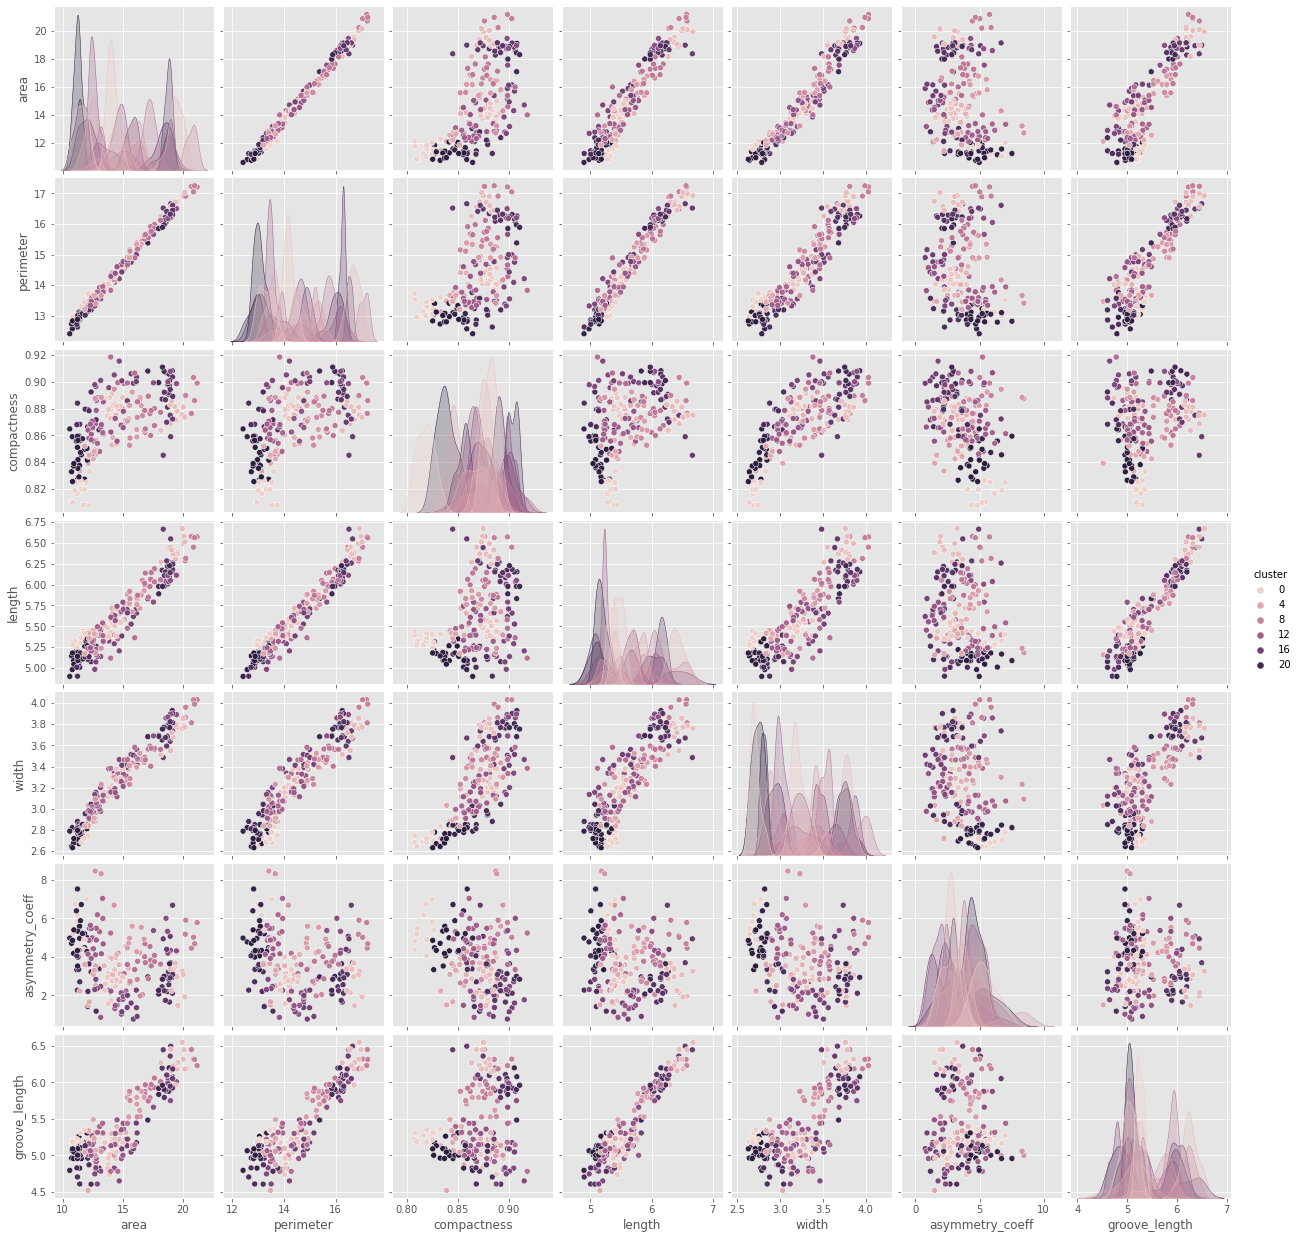

In [31]:
sns.pairplot(df, hue='cluster')

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [32]:
def search_for_k(k_values,data): 
    scaling_methods = ['normalize()',StandardScaler(),MinMaxScaler()] 
    best_sil_score = 0 
    best_params= tuple()
    for k in k_values:
        for method in scaling_methods:
            if method != 'normalize()': 
                X = method.fit_transform(data)
            else: 
                X =normalize(data.to_numpy())
            km = KMeans(n_clusters = k, random_state = 42)
            km.fit_transform(X)
            current_sil_score= silhouette_score(X, km.labels_)
            if current_sil_score > best_sil_score: # new best sil score 
                best_params= (k,method) 
                best_sil_score = current_sil_score 
  

    return best_sil_score, best_params

In [33]:
search_for_k(range(2,5), X)

(0.505113885588951, (2, MinMaxScaler()))

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

_Authors: Joseph Nelson (DC)_

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

We will start out working with the [NHL data](https://github.com/josephnelson93/GA-DSI/blob/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

[Check out this glossary of hockey terms for a reference of what the columns indicate.](http://stats.hockeyanalysis.com/glossary.php)

In [34]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1.  Load our data and perform any basic cleaning and/or EDA.


In [35]:
nhl = pd.read_csv('data/nhl.csv')


In [36]:
nhl.head()

Team  PTS  Rank         TOI   GF  GA  GF60  GA60   GF%    SF  ...  \
0  Washington10  121     1  2001:52:00  115  73  3.45  2.19  61.2  1112  ...   
1   Vancouver11  117     1  2056:14:00   94  72  2.74  2.10  56.6  1143  ...   
2    San Jose10  113     1  1929:54:00   90  68  2.80  2.11  57.0  1065  ...   
3     Chicago10  112     1  2020:23:00  104  83  3.09  2.46  55.6  1186  ...   
4   Vancouver12  111     1  2052:02:00   86  74  2.51  2.16  53.8  1078  ...   

    FF%    CF    CA  CF60  CA60   CF%    Sh%    Sv%   PDO   PIM  
0  51.3  2138  1935  64.1  58.0  52.5  10.34  93.03  1034  1269  
1  53.1  2144  1870  62.6  54.6  53.4   8.22  93.16  1014   985  
2  50.9  1985  1876  61.7  58.3  51.4   8.45  93.46  1019  1195  
3  58.1  2093  1572  62.2  46.7  57.1   8.77  90.44   992   966  
4  51.0  2085  1880  61.0  55.0  52.6   7.98  93.36  1013  1049  

[5 rows x 28 columns]

In [37]:
# A:
nhl.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

### 2. Set up an `X` matrix to perform clustering with DBSCAN.

Let's cluster on all features EXCEPT team and rank.

Make rank be our `y` vector which we can use to do cluster validation. 

In [38]:
# A:
X = nhl.drop(columns = ['Team', 'Rank']) 
y =nhl['Rank']

### 3. Scatter plot EDA

Make two scatter plots. At least one axis in one of the plots should represent points (goals for, GA). Do we obtain a general idea from the scatter plots of how many clusters we should expect to extract with a clustering algorithm?

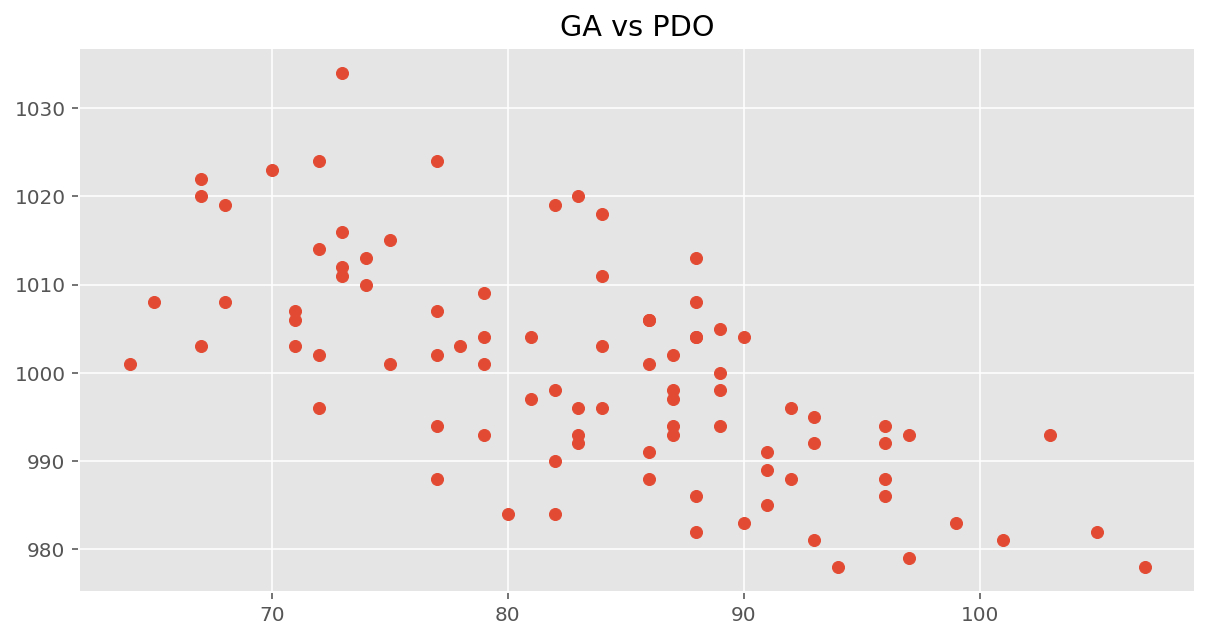

In [39]:
# A:
plt.figure(figsize = (10, 5))
plt.scatter(x = nhl['GA'], y = nhl['PDO'])
plt.title('GA vs PDO');

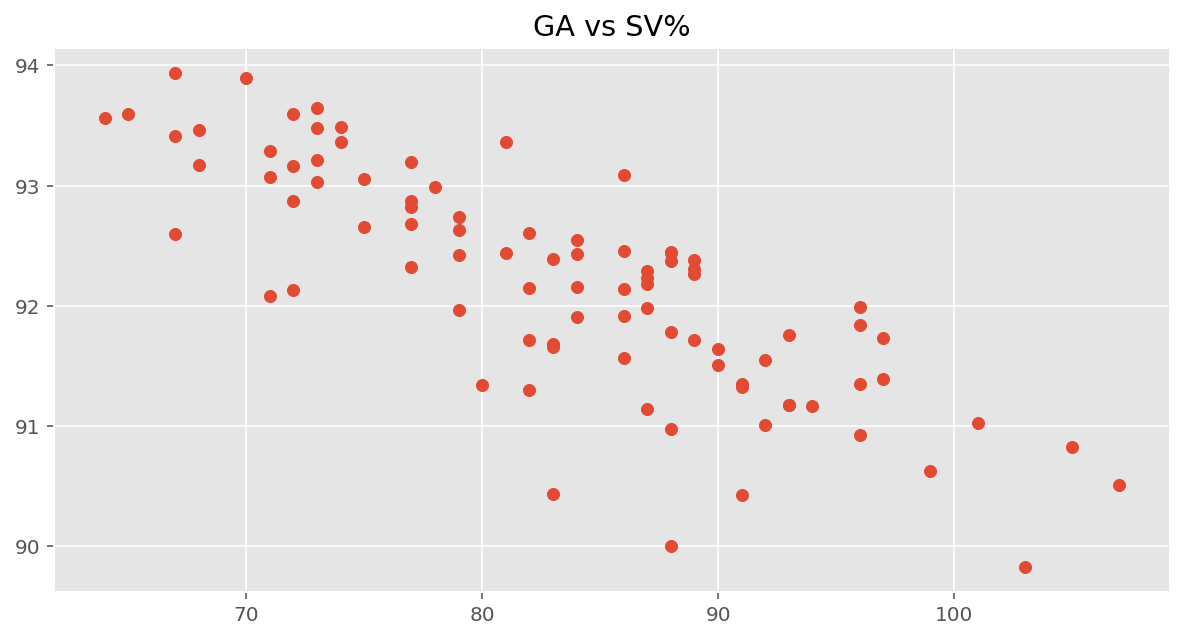

In [40]:
# A:
plt.figure(figsize = (10, 5))
plt.scatter(x = nhl['GA'], y = nhl['Sv%'])
plt.title('GA vs SV%');

## 4. Scale our data

Standardize the data and compare at least one of the scatterplots for the scaled data to unscaled above.

In [41]:
X= X.drop(columns = ['TOI'])

In [42]:
ss = StandardScaler()

In [43]:
# A:
X_scaled = ss.fit_transform(X)

### 5. Fit a DBSCAN clusterer

Remember to pass an `eps` and `min_samples` of your choice.

In [44]:
# A:
clustering = DBSCAN(eps=3, min_samples=2).fit(X_scaled)

### 6. Check out the assigned cluster labels

Using the `.labels_` command on our DBSCAN class

In [45]:
# A:
clustering.labels_

array([ 0,  1,  1, -1,  1,  2,  3, -1, -1,  4,  0,  1, -1, -1,  5,  2, -1,
       -1,  4,  4, -1,  4, -1, -1,  2,  6,  6,  4,  4, -1,  1,  4,  4, -1,
       -1,  4,  4,  4,  7, -1,  3,  4,  4,  8, -1,  4, -1,  8, -1,  4,  4,
        4, -1,  4,  4,  4, -1,  4,  9,  4, -1, -1, -1,  9, -1,  4, -1, -1,
       10, -1, -1,  9,  9,  4,  7,  7,  5,  4, -1,  5, -1,  4,  7,  7, 10,
        4,  4,  4, 10, -1], dtype=int64)

### 7. Evaluate the DBSCAN clusters

**7.1 Check the silhouette score.**

How are the clusters?

If you're feeling adventurous, see how you can adjust our epsilon and min_points to improve this.

In [46]:
# A:
silhouette_score(X_scaled, clustering.labels_)

-0.031072147270604554

That is a bad score.

**7.2 Check the homogeneity, completeness, and V-measure against the stored rank `y`**

In [47]:
# A:
from sklearn.metrics.cluster import homogeneity_completeness_v_measure


In [48]:
homogeneity_completeness_v_measure(clustering.labels_, y)

(0.15330607211980093, 0.2609183089769857, 0.19313378409783125)

### 8. Plot the clusters

You can choose any two variables for the axes.

In [49]:
nhl['cluster'] = clustering.labels_

In [50]:
nhl['cluster'].value_counts()

-1     30
 4     29
 1      5
 7      5
 9      4
 2      3
 5      3
 10     3
 0      2
 3      2
 6      2
 8      2
Name: cluster, dtype: int64

<Figure size 504x504 with 0 Axes>

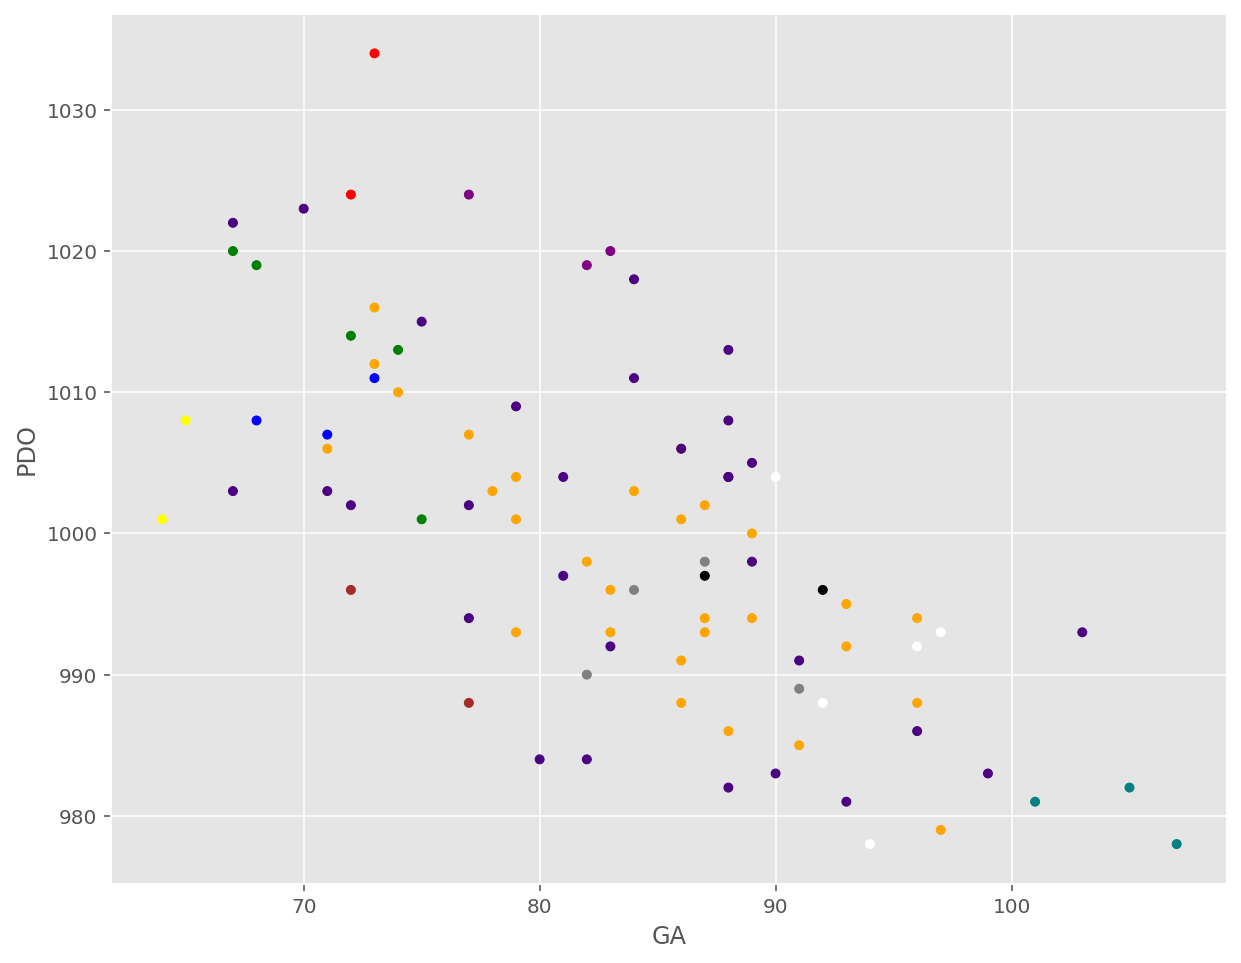

In [51]:
# A:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue", "yellow", "orange", "purple", "black", "white", "brown", "gray", "teal", "indigo"]
nhl['color'] = nhl['cluster'].map(lambda p: colors[p])

ax = nhl.plot(    
    kind="scatter", 
    x="GA", y="PDO",
    figsize=(10,8),
    c = nhl['color']
)


### 9. Fit DBSCAN on an easier dataset

Import the `make_circles` function from `sklearn.datasets`. You can use this to create some fake clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

**9.1 Plot the fake circles data.**

In [52]:
# A:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.3, factor=0.3)

**9.2 Scale the data and fit DBSCAN on it.**

In [53]:
# A:
circles_X_scaled = ss.fit_transform(circles_X)

In [54]:
c2 = DBSCAN(eps=4, min_samples=2).fit(circles_X_scaled)

**9.3 Evaluate DBSCAN visually, with silhouette, and with the metrics against the true `y`.**

In [55]:
c2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
homogeneity_completeness_v_measure(c2.labels_, circles_y)

(1.0, 0.0, 0.0)

Everything is classified as a 0 so I can not do a siloutte score.